In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import numpy as np
import matplotlib.dates as mdates


In [18]:
# Load the data from the csv file, and parse the dates to datetime format
df_TAT = pd.read_excel("Vorlage_TAT_Lithium.xlsx", header=[0, 1])

# Ab der dritten Spalte die Werte in datetime konvertieren
for col in df_TAT.columns[2:]:  # Nur ab der dritten Spalte
    df_TAT[col] = pd.to_datetime(df_TAT[col], errors='coerce', dayfirst=True)  # Fehlerhafte Werte werden zu NaT


df_TAT.head()
df_TAT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   (Unnamed: 0_level_0, Auftragsnummer)        4 non-null      int64         
 1   (Unnamed: 1_level_0, Anforderung)           4 non-null      object        
 2   (Präanalytische Phase, Eingang)             4 non-null      datetime64[ns]
 3   (Analytische Phase, Messung)                4 non-null      datetime64[ns]
 4   (Postanalytische Phase, Tech. Validation)   4 non-null      datetime64[ns]
 5   (Postanalytische Phase, Validation)         4 non-null      datetime64[ns]
 6   (Postanalytische Phase, Auftragsabschluss)  4 non-null      datetime64[ns]
dtypes: datetime64[ns](5), int64(1), object(1)
memory usage: 356.0+ bytes


In [21]:
# Dictionary zur Speicherung der Phasen und ihrer Schritte
phases = {}

# Iteration über die Spalten ab der dritten
for col in df_TAT.columns[2:]:
    phase = col[0].strip()  # Übergeordnete Phase
    step = col[1].strip()   # Untergeordneter Schritt
    
    # Phase hinzufügen, falls noch nicht vorhanden
    if phase not in phases:
        phases[phase] = []
    
    # Schritt hinzufügen, falls noch nicht vorhanden
    if step not in phases[phase]:
        phases[phase].append(step)

# Ausgabe der Phasenstruktur
for phase, checkpoints in phases.items():
    print(f"{phase}:")
    for checkpoint in checkpoints:
        print(f"  - {checkpoint}")

Präanalytische Phase:
  - Eingang
Analytische Phase:
  - Messung
Postanalytische Phase:
  - Tech. Validation
  - Validation
  - Auftragsabschluss


In [5]:
phases = {
    "Präanalytische Phase": ["Eingang"],
    "Analytische Phase": ["Messung", ],
    "Postanalytische Phase": ["Tech. Validation","Validation","Auftragsabschluss"]
}

# Example of accessing the data structure
for phase, checkpoints in phases.items():
    print(f"{phase}:")
    for checkpoint in checkpoints:
        print(f"  - {checkpoint}")

Präanalytische Phase:
  - Eingang
Analytische Phase:
  - Messung
Postanalytische Phase:
  - Tech. Validation
  - Validation
  - Auftragsabschluss


In [6]:
# Get the keys of the phases
phase_keys = list(phases.keys())

# Iterate through the phases
for i in range(len(phase_keys)):
    current_phase = phase_keys[i]
    current_phase_checkpoints = phases[current_phase]

    last_phase = len(phase_keys) - 1 # With 3 phases, the last phase is 2

    if i < last_phase:
        # For all but the last phase, calculate the difference between the first column of the current phase and the next phase
        next_phase = phase_keys[i + 1]
        next_phase_checkpoints = phases[next_phase]

        coL_phase_start = current_phase_checkpoints[0]
        col_phase_end = next_phase_checkpoints[0]

        print(f"Calculating TAT for {current_phase}: {coL_phase_start} - {col_phase_end}")

        df_TAT[f"{current_phase}"] = df_TAT[col_phase_end] - df_TAT[coL_phase_start]

        df_TAT[f"{current_phase} in Minuten"] = df_TAT[current_phase].dt.total_seconds() / 60

    else:
        # For the last phase, calculate the difference between its first and last column

        coL_phase_start = current_phase_checkpoints[0]
        col_phase_end = current_phase_checkpoints[-1]
        
        print(f"Calculating TAT for {current_phase}: {coL_phase_start} - {col_phase_end}")

        df_TAT[f"{current_phase}"] = df_TAT[col_phase_end] - df_TAT[coL_phase_start]

        df_TAT[f"{current_phase} in Minuten"] = df_TAT[current_phase].dt.total_seconds() / 60

df_TAT


Calculating TAT for Präanalytische Phase: Eingang - Messung
Calculating TAT for Analytische Phase: Messung - Tech. Validation
Calculating TAT for Postanalytische Phase: Tech. Validation - Auftragsabschluss


,Anforderung,Eingang,Messung,Eingang - Messung [s],Tech. Validation,Messung - Tech. Validation [s],Validation,Messung - Validation [s],Auftragsabschluss,Validation - Abschluss [s],Präanalytische Phase,Präanalytische Phase in Minuten,Analytische Phase,Analytische Phase in Minuten,Postanalytische Phase,Postanalytische Phase in Minuten
0,li,2024-05-15 12:45:45,2024-05-15 14:46:59,7274,2024-05-15 16:10:00,4981,2024-05-15 17:07:01,8402,2024-05-15 17:07:01,00,0 days 02:01:14,121.233333,0 days 01:23:01,83.016667,0 days 00:57:01,57.016667
1,li,2024-05-16 13:01:01,2024-05-16 14:15:22,4461,2024-05-16 14:56:01,2439,2024-05-16 16:00:00,6278,2024-05-16 16:00:00,00,0 days 01:14:21,74.350000,0 days 00:40:39,40.650000,0 days 01:03:59,63.983333
2,li,2024-05-06 12:38:54,2024-05-06 14:13:00,5646,2024-05-06 15:01:00,2880,2024-05-06 15:45:00,5520,2024-05-06 15:45:00,00,0 days 01:34:06,94.100000,0 days 00:48:00,48.000000,0 days 00:44:00,44.000000
3,li,2024-05-31 12:18:47,2024-05-31 13:06:10,2843,2024-05-31 13:10:00,230,2024-05-31 13:41:00,2090,2024-05-31 14:25:36,2676,0 days 00:47:23,47.383333,0 days 00:03:50,3.833333,0 days 01:15:36,75.600000
4,li,2024-05-14 12:26:35,2024-05-14 13:17:32,3057,2024-05-14 13:47:00,1768,2024-05-14 13:58:00,2428,2024-05-14 13:58:00,00,0 days 00:50:57,50.950000,0 days 00:29:28,29.466667,0 days 00:11:00,11.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,li,2024-05-01 13:54:13,2024-05-01 14:38:02,2629,2024-05-01 15:05:00,1618,2024-05-01 16:03:00,5098,2024-05-01 16:03:00,00,0 days 00:43:49,43.816667,0 days 00:26:58,26.966667,0 days 00:58:00,58.000000
312,li,2024-05-01 12:34:29,2024-05-01 13:33:43,3554,2024-05-01 13:40:00,377,2024-05-01 13:50:01,978,2024-05-01 13:50:01,00,0 days 00:59:14,59.233333,0 days 00:06:17,6.283333,0 days 00:10:01,10.016667
313,li,2024-05-01 14:23:43,2024-05-01 16:53:26,8983,2024-05-01 16:56:00,154,2024-05-01 17:05:01,695,2024-05-09 02:07:55,637374,0 days 02:29:43,149.716667,0 days 00:02:34,2.566667,7 days 09:11:55,10631.916667
314,li,2024-05-01 18:19:59,2024-05-01 19:04:56,2697,2024-05-01 19:19:00,844,2024-05-01 19:27:00,1324,2024-05-01 19:27:00,00,0 days 00:44:57,44.950000,0 days 00:14:04,14.066667,0 days 00:08:00,8.000000


In [7]:
# Calculate the difference between the first and last checkpoint over all phases
first_checkpoint = phases[phase_keys[0]][0]
last_checkpoint = phases[phase_keys[-1]][-1]

df_TAT['Total_TAT'] = df_TAT[last_checkpoint] - df_TAT[first_checkpoint]
df_TAT['Total_TAT in Minuten'] = df_TAT['Total_TAT'].dt.total_seconds() / 60
df_TAT[['Total_TAT', 'Total_TAT in Minuten']]

,Total_TAT,Total_TAT in Minuten
0,0 days 04:21:16,261.266667
1,0 days 02:58:59,178.983333
2,0 days 03:06:06,186.100000
3,0 days 02:06:49,126.816667
4,0 days 01:31:25,91.416667
...,...,...
311,0 days 02:08:47,128.783333
312,0 days 01:15:32,75.533333
313,7 days 11:44:12,10784.200000
314,0 days 01:07:01,67.016667


In [8]:
df_TAT.describe()

,Eingang,Messung,Eingang - Messung [s],Tech. Validation,Messung - Tech. Validation [s],Validation,Messung - Validation [s],Auftragsabschluss,Präanalytische Phase,Präanalytische Phase in Minuten,Analytische Phase,Analytische Phase in Minuten,Postanalytische Phase,Postanalytische Phase in Minuten,Total_TAT,Total_TAT in Minuten
count,316,316,316.000000,316,316.000000,316,316.000000,316,316,316.000000,316,316.000000,316,316.000000,316,316.000000
mean,2024-05-16 23:50:38.632911360,2024-05-17 02:02:19.018987264,7900.386076,2024-05-17 02:27:48.579113728,1529.560127,2024-05-17 03:06:43.582278400,3864.563291,2024-05-17 17:34:02.468354304,0 days 02:11:40.386075949,131.673101,0 days 00:25:29.560126582,25.492669,0 days 15:06:13.889240506,906.231487,0 days 17:43:23.835443037,1063.397257
min,2024-05-01 12:34:12,2024-05-01 13:18:55,1244.000000,2024-05-01 13:40:00,27.000000,2024-05-01 13:50:01,215.000000,2024-05-01 13:50:01,0 days 00:20:44,20.733333,0 days 00:00:27,0.450000,0 days 00:01:00,1.000000,0 days 00:32:12,32.200000
25%,2024-05-08 13:43:50.750000128,2024-05-08 17:36:05.500000,3251.750000,2024-05-08 17:40:03,412.750000,2024-05-08 17:55:05.500000,1482.500000,2024-05-09 00:16:15,0 days 00:54:11.750000,54.195833,0 days 00:06:52.750000,6.879167,0 days 00:11:01.750000,11.029167,0 days 01:48:40.250000,108.670833
50%,2024-05-16 12:51:31.500000,2024-05-16 13:57:01,4494.500000,2024-05-16 14:37:01.500000,1079.000000,2024-05-16 15:57:30,2727.500000,2024-05-16 23:44:43.500000,0 days 01:14:54.500000,74.908333,0 days 00:17:59,17.983333,0 days 00:39:00,39.000000,0 days 03:15:47.500000,195.791667
75%,2024-05-24 12:31:16,2024-05-24 13:36:22,7497.250000,2024-05-24 13:47:12.500000,2022.250000,2024-05-24 13:58:15.750000128,4742.250000,2024-05-24 15:15:15.249999872,0 days 02:04:57.250000,124.954167,0 days 00:33:42.250000,33.704167,0 days 10:41:45.250000,641.754167,0 days 13:34:24.250000,814.404167
max,2024-06-03 10:14:28,2024-06-03 12:49:59,238810.000000,2024-06-03 12:56:00,8025.000000,2024-06-03 13:42:00,54030.000000,2024-06-10 16:58:00,2 days 18:20:10,3980.166667,0 days 02:13:45,133.750000,15 days 23:29:51,23009.850000,16 days 03:43:40,23263.666667
std,NaN,NaN,15736.367635,NaN,1485.525825,NaN,4526.337768,NaN,0 days 04:22:16.367635058,262.272794,0 days 00:24:45.525825196,24.758764,1 days 18:26:48.663152417,2546.811053,1 days 18:38:21.654092317,2558.360902


# Diagramme

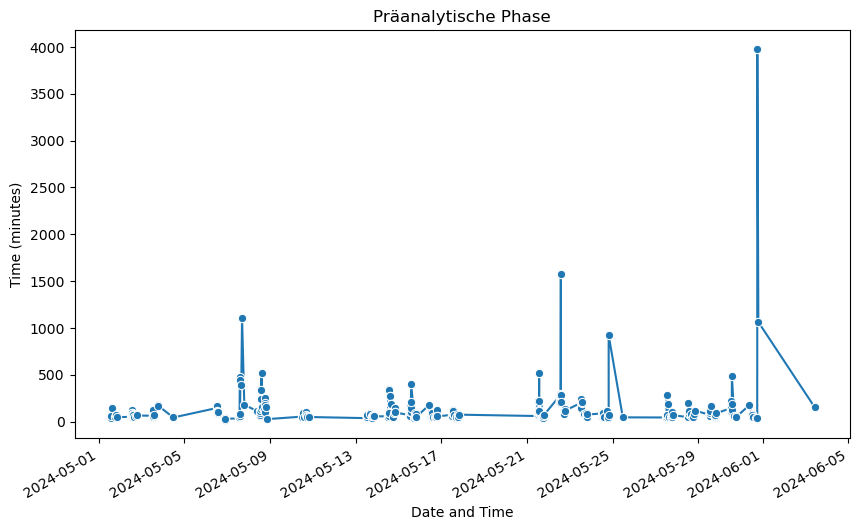

In [9]:
from matplotlib.ticker import ScalarFormatter

# Generate charts for each phase
# Line chart
fig=plt.figure(figsize=(10, 6))
sns.lineplot(x=df_TAT["Eingang"], y='Präanalytische Phase in Minuten', data=df_TAT, marker='o')
ax=plt.gca()
# format data to desired format. Here I chose YYYY-MM-DD 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Disable scientific notation for the y-axis
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.get_offset_text().set_visible(False)  # Optional: remove offset text

# rotate and align the tick labels so they look better
fig.autofmt_xdate()
plt.title('Präanalytische Phase')
plt.xlabel('Date and Time')
plt.ylabel('Time (minutes)')
plt.show()

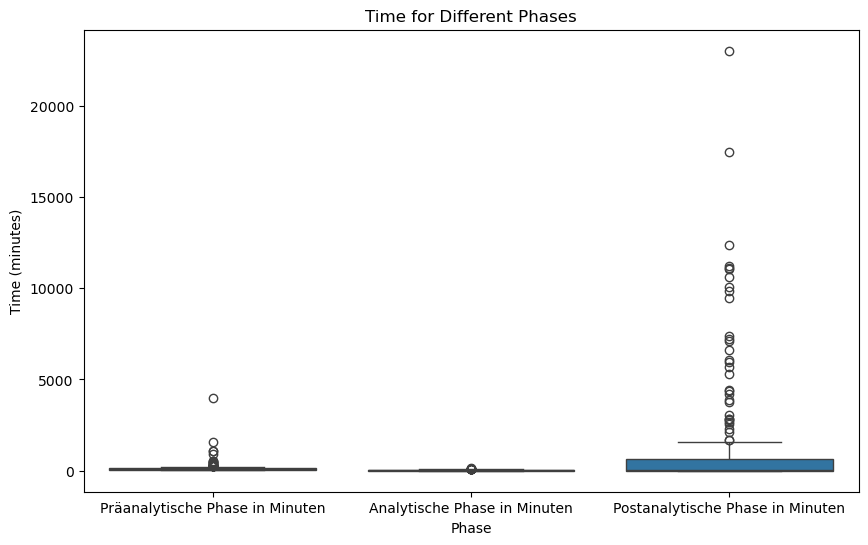

In [10]:
# Select only the columns that contain numeric time data
time_columns = ["Präanalytische Phase in Minuten", "Analytische Phase in Minuten", "Postanalytische Phase in Minuten"]

# Melt the DataFrame to long format for seaborn
df_melted = df_TAT.melt(id_vars=["Eingang"], value_vars=time_columns, var_name='Phase', value_name='Time (minutes)')

# Create a box and whiskers plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Phase', y='Time (minutes)', data=df_melted)
plt.title('Time for Different Phases')
plt.ylabel('Time (minutes)')
plt.xlabel('Phase')
plt.show()

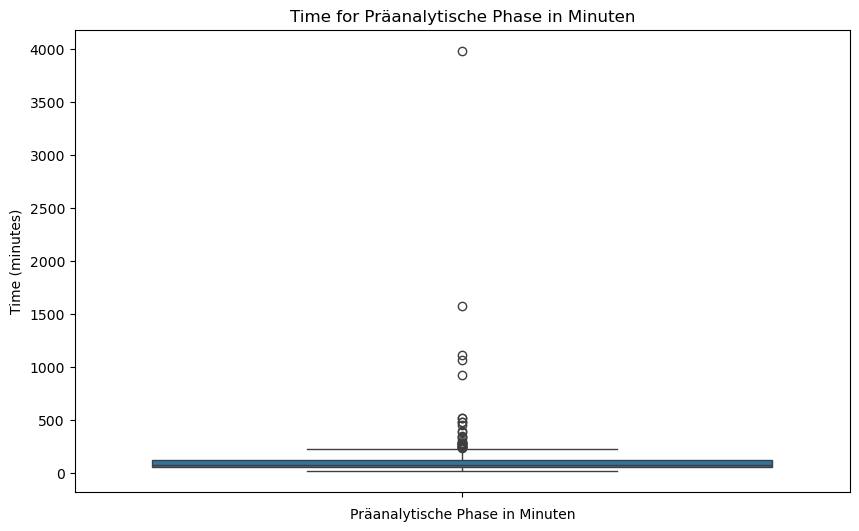

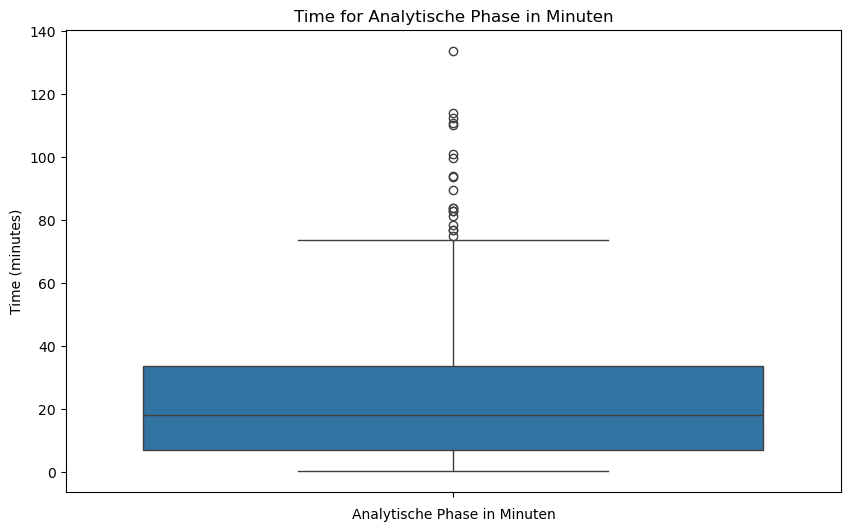

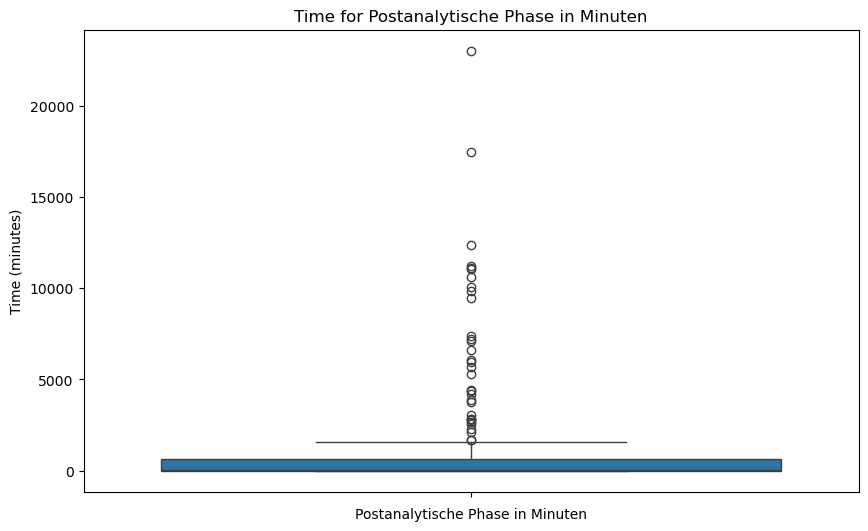

In [11]:
# Analytische Phase so lange?

# Create separate box and whiskers plots for each phase
phases = df_melted['Phase'].unique()
for phase in phases:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y='Time (minutes)', data=df_melted[df_melted['Phase'] == phase])
    plt.title(f'Time for {phase}')
    plt.ylabel('Time (minutes)')
    plt.xlabel(phase)
    plt.show()